## Importing Libraries

In [1]:
# Importing all the essential libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
# For better display of rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Importing data
df_train = pd.read_csv("train.csv", index_col="Id")
df_test = pd.read_csv("test.csv", index_col="Id")

## Data Cleaning

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
# Columns which have NaN values
train_temp = pd.DataFrame(df_train.isna().sum().sort_values(ascending=False), columns=['NaN']) 

# Data type of each columns 
train_temp['DataType'] = pd.DataFrame(df_train.dtypes)

# Percentage of NaN values
train_temp['Percentage'] = pd.DataFrame((train_temp['NaN'] / 1460) * 100 ) 

# Printing all the colunns which have NaN values
train_temp[train_temp['NaN'] != 0]

,NaN,DataType,Percentage
PoolQC,1453,object,99.520548
MiscFeature,1406,object,96.301370
Alley,1369,object,93.767123
Fence,1179,object,80.753425
FireplaceQu,690,object,47.260274
LotFrontage,259,float64,17.739726
GarageYrBlt,81,float64,5.547945
GarageCond,81,object,5.547945
GarageType,81,object,5.547945
GarageFinish,81,object,5.547945


In [7]:
# Dropping the columns such as PoolQC, MiscFeature, Alley, Fence and FireplaceQu as it has too many NaN values 
 
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

df_test = df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [8]:
# Removed the same columns from temp so that we can work on other NaN values
train_temp.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 0, inplace= True)

In [9]:
train_temp[train_temp['NaN'] != 0]

,NaN,DataType,Percentage
LotFrontage,259,float64,17.739726
GarageYrBlt,81,float64,5.547945
GarageCond,81,object,5.547945
GarageType,81,object,5.547945
GarageFinish,81,object,5.547945
GarageQual,81,object,5.547945
BsmtExposure,38,object,2.602740
BsmtFinType2,38,object,2.602740
BsmtCond,37,object,2.534247
BsmtQual,37,object,2.534247


In [10]:
# Filling all these columns with NA

none_columns = ['GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical', 'MasVnrArea']

for column in none_columns :
    df_train[column] = df_train[column].fillna('NA')
    df_test[column] = df_test[column].fillna('NA')

In [11]:
# Removed the same columns from temp so that we can work on other NaN values
train_temp.drop(['GarageType', 'GarageCond', 'GarageQual', 'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'MasVnrType', 'Electrical', 'MasVnrArea'], axis = 0, inplace= True)

train_temp[train_temp['NaN'] != 0]

,NaN,DataType,Percentage
LotFrontage,259,float64,17.739726
GarageYrBlt,81,float64,5.547945


In [12]:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
# Filling the NaN values with the mean
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

print("Train: " , df_train['LotFrontage'].isna().sum())
print("Test: " , df_test['LotFrontage'].isna().sum())

Train:  0
Test:  0


In [14]:
df_train['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4
1921.0     3

In [15]:
# Filling the NaN values with the mean in both df_test and df_train
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna('2005')
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna('2005)')

print("Train: " , df_train['GarageYrBlt'].isna().sum())
print("Test: " , df_test['GarageYrBlt'].isna().sum())

Train:  0
Test:  0


In [16]:
# Checking if df_train has any NaN values
df_train.isna().sum().sort_values(ascending=False)

MSSubClass       0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSZoning         0
YearRemodAdd     0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street      

In [17]:
# Columns which have NaN values
test_temp = pd.DataFrame(df_test.isna().sum().sort_values(ascending=False), columns=['NaN']) 

# Data type of each columns 
test_temp['DataType'] = pd.DataFrame(df_train.dtypes)


# Printing all the colunns which have NaN values
test_temp[test_temp['NaN'] != 0]

,NaN,DataType
MSZoning,4,object
BsmtFullBath,2,int64
Utilities,2,object
BsmtHalfBath,2,int64
Functional,2,object
BsmtFinSF1,1,int64
Exterior1st,1,object
KitchenQual,1,object
GarageCars,1,int64
GarageArea,1,int64


In [18]:
fill = ['MSZoning', 'BsmtFullBath','Utilities' , 'BsmtHalfBath', 'Functional', 'BsmtFinSF1', 'Exterior1st', 'KitchenQual', 'GarageCars', 'GarageArea', 'Exterior2nd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SaleType']

for column in fill :
    if df_test[column].dtype != 'object':
        df_test[column] = df_test[column].fillna(df_test[column].mean())
    else:
        df_test[column] = df_test[column].fillna(df_test[column].mode().iloc[0])

In [19]:
df_test.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Label Encoding

In [20]:
# Using Labelncoder to convert categorical variables to numeric"
label_encoder = LabelEncoder()

In [21]:
# Converting all the columns which has data type of object to numeric 
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        df_train[i] = label_encoder.fit_transform(df_train[i].astype(str))
        df_test[i] = label_encoder.fit_transform(df_test[i].astype(str))

In [22]:
# Correlation of all the other variables wrt to SalePrice
df_train[df_train.columns[1:]].corr()['SalePrice'][:].abs().sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
ExterQual        0.636884
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
BsmtQual         0.593734
KitchenQual      0.589189
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
GarageFinish     0.425684
GarageType       0.415283
GarageYrBlt      0.404420
HeatingQC        0.400178
BsmtFinSF1       0.386420
Foundation       0.382479
MasVnrArea       0.345332
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtExposure     0.294589
HalfBath         0.284108
LotArea          0.263843
LotShape         0.255580
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.237044
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood

## Train Test Split

In [23]:
X = df_train.drop(['SalePrice'], axis= 1)
y = df_train['SalePrice']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.score(X_train, y_train)

0.8812668784753014

In [27]:
training_prediction = model.predict(X_test)

<AxesSubplot:xlabel='SalePrice'>

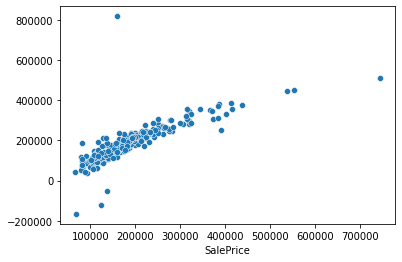

In [28]:
sns.scatterplot(y_test, training_prediction)

In [29]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, training_prediction))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, training_prediction))

Mean Absolute Error:  25094.97024331672
Mean Squared Error:  2946423415.6483784


In [30]:
testing_prediction = model.predict(df_test)

In [31]:
indexNo = df_test.index

In [32]:
f = open("LinearRegression_Solution.csv", "a")

In [33]:
f.write("Id,SalePrice")

12

In [34]:
for i in range(len(testing_prediction)):
    f.write("\n{},{}".format(indexNo[i], testing_prediction[i])) 

In [35]:
f.close()